Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Тебе удалось добиться очень хорошего качества, поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error as mse, make_scorer

from lightgbm import LGBMRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#!pip install imblearn

In [3]:
#import sklearn
#from imblearn import FunctionSampler

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [4]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Данные состоят из одной колонки количества заказов такси ```num_orders``` c 1 марта 2018 по 31 августа 2018

Проверим на содержание дубликатов

In [6]:
df.isna().sum()

num_orders    0
dtype: int64

Проверим монотоность временного ряда

In [7]:
print(df.index.is_monotonic)

True


Сделаем ресемплирование по одному часу

In [8]:
df = df.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

## Анализ

Расмотрим графики данных, а также графики ```Trend, seasonal, residuals```

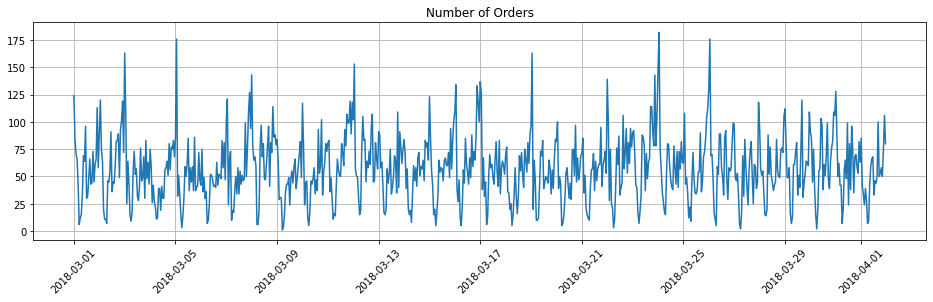

In [9]:
plt.figure(figsize=(16, 4))
plt.grid()
plt.xticks(rotation=45)
plt.plot(df['2018-03-01':'2018-04-01'])
plt.title('Number of Orders')
plt.show()

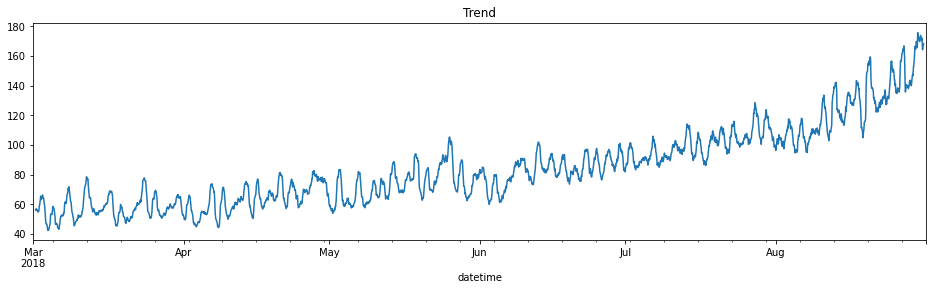

In [48]:
decomposed = seasonal_decompose(df['2018-03-01':'2018-08-31'])
plt.figure(figsize=(16, 4))
decomposed.trend.plot()
plt.title('Trend')
plt.show()

По данным графика ```Trend``` видно, что со временем количество вызовов такси увеличивается.

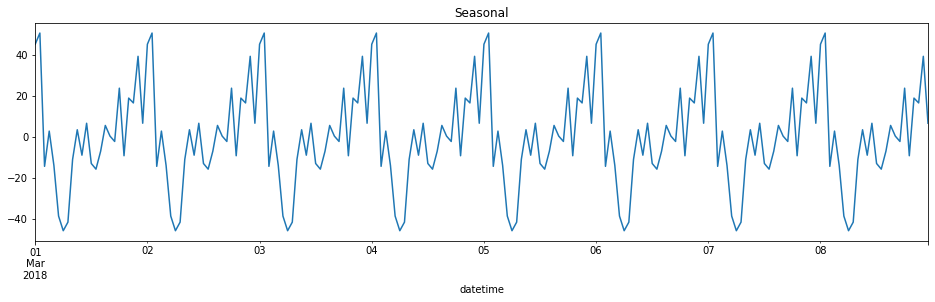

In [11]:
decomposed = seasonal_decompose(df['2018-03-01':'2018-03-08'])
plt.figure(figsize=(16, 4))
decomposed.seasonal.plot()
plt.title('Seasonal')
plt.show()

По данному графику видно, что пик спроса на такси приходится на вечер, а минимум в ночное время. Так же видно, что это стационарный временной ряд.

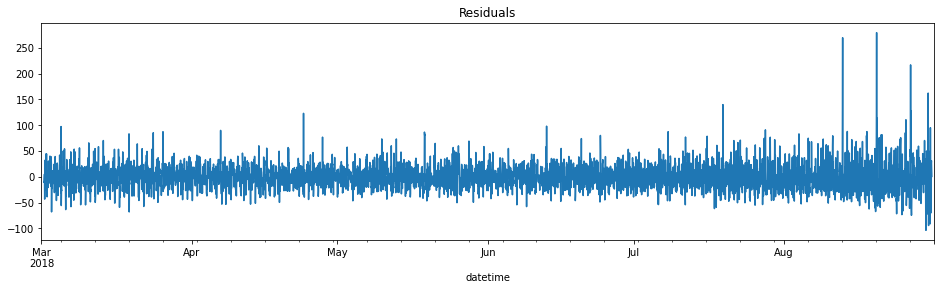

In [49]:
decomposed = seasonal_decompose(df['2018-03-01':'2018-08-31'])
plt.figure(figsize=(16, 4))
decomposed.resid.plot()
plt.title('Residuals')
plt.show()

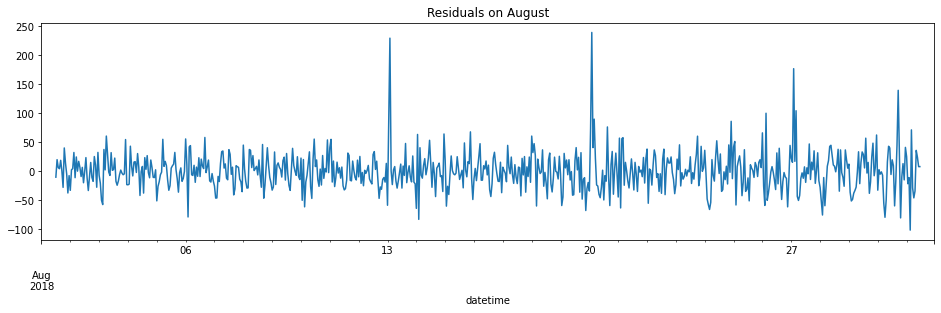

In [51]:
decomposed = seasonal_decompose(df['2018-08-01':'2018-08-31'])
plt.figure(figsize=(16, 4))
decomposed.resid.plot()
plt.title('Residuals on August')
plt.show()

По данному графику видно, что существуют единичный пики, возможно это выходные или праздники.

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Однако, желательно было сначала првоести декомпозицию всего ряда, а затем взять подотрезок.
</div>

## Обучение

Создадим функцию для расчёта метрики ```RMSE``` и функцию которая дополняет новыми признаками наши данные

In [13]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

rmse = make_scorer(root_mean_squared_error, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>Успех:</b> Скорер определен правильно.
</div>

In [14]:
def features_supplement(data, max_lag, mean_rolling, dow=True):
    
    X = data.copy()
    
    for lag in range(1, max_lag+1):
        X['lag_{}'.format(lag)] = X['num_orders'].shift(lag)
    
    X['lag_24'] = X['num_orders'].shift(24)
    X['mean_rolling'] = X['num_orders'].rolling(mean_rolling).mean()
    
    if dow==True:
        X['dayofweek'] = X.index.dayofweek
        
    X = X.dropna(axis = 0)
    
    y = X['num_orders']
    X = X.drop('num_orders', axis = 1)
       
    return X, y

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что эта функция не изменяет глобальную переменную!
</div>

Добавим 3 столбца смешенных на 1, 2, 3 часа данные, также столбец смешённых данных на сутки, столбец со скользящим среднем и столбец дня недели.

In [15]:
X, y = features_supplement(df, 3, 7)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

In [17]:
ls = ElasticNet()

In [18]:
cv = TimeSeriesSplit(n_splits=8)

In [19]:
params = {
    'alpha': [0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.7, 1]
}

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано верно.
</div>

### ElasticNet

Подберём лучшие параметры для алгоритма ```ElasticNet```

In [20]:
grid = GridSearchCV(ls, param_grid=params, scoring=rmse, cv=cv, verbose=True)

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящим под данные сплиттером.
</div>

In [21]:
#grid.fit(X_train, y_train)

Параметры лучшей модели и её метрика

In [22]:
#print(grid.best_params_, grid.best_score_)

### LGBM

Подберём лучшие параметры для алгоритма ```LGBM```

In [23]:
lgbm = LGBMRegressor(boosting_type='gbdt', verbose=0, random_state=12345)
            
params = {
        'num_leaves': [20, 31],
        'max_depth': [3, 5],
        'learning_rate': [0.08, 0.1]
}

In [24]:
grid = GridSearchCV(lgbm, param_grid=params, scoring=rmse, cv=cv, verbose=True)

In [25]:
#grid.fit(X_train, y_train)

Параметры лучшей модели и её метрика

In [26]:
#print(grid.best_params_, grid.best_score_)

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Тестирование

Протестируем модель с алгоритмом ```LGBM``` на тестовых данных с подобранными выше параметрами

In [27]:
lgbm_t = LGBMRegressor(boosting_type='gbdt', verbose=-1, learning_rate = 0.1, max_depth = 3, num_leaves = 20, random_state=12345)

In [28]:
lgbm_t.fit(X_train, y_train)

LGBMRegressor(max_depth=3, num_leaves=20, random_state=12345, verbose=-1)

In [29]:
y_pred = lgbm_t.predict(X_test)

In [30]:
np.sqrt(mse(y_test, y_pred))

41.98546500466936

Метрика ```RMSE``` составила 42, что ниже проектного значения 48. 

Проверим эту метрику на простой модели, которая предсказывает значения по предыдущему значению

In [31]:
y_pred_dumb = y_test.shift(1)
y_pred_dumb.iloc[0] = y_train.iloc[-1]

In [32]:
np.sqrt(mse(y_test, y_pred_dumb))

58.881776776551476

Метрика ```RMSE``` составила 59, что подтверждает адекватность нашей модели.

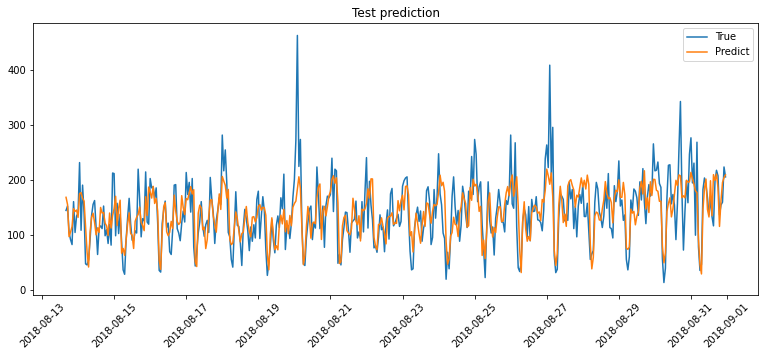

In [47]:
plt.figure(figsize=(13, 5))
plt.plot(y_test, label='True')
plt.plot(y_test.index, y_pred, label='Predict')
plt.xticks(rotation=45)
plt.title('Test prediction')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано корректно. Хорошо, что ты не забыл про дамми проверку!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальные предсказания можно было визуализирвоать: графики исходного и предсказанных рядов.
</div>

## Выводы

Были проанализированны данные о заказах такси за полгода 2018 года. Был выявлен тренд на увеличение количества заказов.

Для обучения модели были сгенерированны новые признаки такие как смещенные данные (на 1, 2, 3 и 24 часа), а также данные о скользящем среднем и днём недели.

Модель выбиралась из ```ElasticNet``` и ```LGBM```, также были подобранны лучшие гиперпараметры этих моделей.

По результатам анализа моделей лучшей оказалась ```LGBM``` с 24,59, против 25,51 у ```ElasticNet```

На тестовых данных ```LGBM``` показал ```RMSE``` 42, что меньше требований проекта. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48